# **Working with NumPy**
In this assignment, you will be familiarized with the usage of the NumPy library and how to use vectorization to speed up computations in comparision to iterative approaches.

**Start by running the below cell, to import the NumPy library.**

In [2]:
import numpy as np

### **Initializating Arrays**
NumPy offers multiple methods to create and populate arrays
- Create a $2\times3$ array identical to
$\begin{bmatrix}
1 & 2 & 4\\
7 & 13 & 21\\
\end{bmatrix}$, and assign it to a variable `arr`.  

In [44]:
# Your code here
# We have initialized arr to an array of zeros for now. Make it the above matrix instead
arr = np.zeros((2,3))
print(arr)
print("Shape: ", arr.shape)

[[0. 0. 0.]
 [0. 0. 0.]]
Shape:  (2, 3)


You can also transpose arrays (same as with matrices), but a more general and commonly used function is the `array.reshape()` function.

$$
\begin{bmatrix}
a & d\\
b & e\\
c & f\\
\end{bmatrix}
\xleftarrow{\text{.T}}
\begin{bmatrix}
a & b & c\\
d & e & f\\
\end{bmatrix}
\xrightarrow{\text{.reshape(3, 2)}}
\begin{bmatrix}
a & b\\
c & d\\
e & f\\
\end{bmatrix}
\xrightarrow{\text{.reshape(6,1)}}
\begin{bmatrix}
a\\b\\c\\d\\e\\f\\
\end{bmatrix}
$$
`reshape` is commonly used to flatten data stored in multi-dimensional arrays (ex: a 2D array representing a B/W image)

- Try it out yourself:

In [46]:
y = np.array([[1, 2, 3],
              [4, 5, 6]])

# < START >
# Create a new array y_transpose that is the transpose of matrix y

# < END >

print(y_transpose)

# < START >
# Create a new array y_flat that contains the same elements as y but has been flattened to a column array
# Note that there are multiple ways to do this. We would encourage you to try reshape first, as it is more versatile
# Once you are comfortable with reshape, you can try using .flatten() as well

# < END >

print(y_flat)

[[1 4]
 [2 5]
 [3 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


Why is Numpy much faster than matrix operations you could try coding on your own? Firstly, it executes C code, rather than using methods of the Python list, which are quite slow. Secondly, it ensures that all data is of the same datatype, removing the need to check for the data's type during execution. Thirdly, operations such as transpose and reshape are made easy by storing the actual matrix as a flat list, and only storing its dimensions (and the strides required to move along each dimension) separately.

For notes on indexing and slicing in numpy, check out https://www.programiz.com/python-programming/numpy/array-slicing

### Broadcasting
The biggest power of numpy comes in its ability to handle arithmetic between arrays and arrays, and arrays and scalars, and so on, very easily. 

The below link has a very useful amount of theory about broadcasting - https://numpy.org/doc/stable/user/basics.broadcasting.html

In [ ]:
arr1 = np.array([1, 2, 3, 4])
b = 1

# <START>
# Implement broadcasting to add b to each element of arr1

# <END>

print(arr1)

arr2 = np.array([[1, 2, 3],
                 [4, 5, 6]])
arr3 = np.array([[4],
                 [5]])

# <START>
# Multiply each element of the first row of arr2 by 4 and each element of the second row by 5, using only arr2 and arr3

# <END>

print(arr2)

[2 3 4 5]
[[ 4  8 12]
 [20 25 30]]


### Linear Regression
Having learnt some basic features of numpy, let us try using it for a very common problem - linear regression.
Given an ndarray X and an array y, we want to find the least squares solution to Ax=b (make sure you don't forget a constant term).

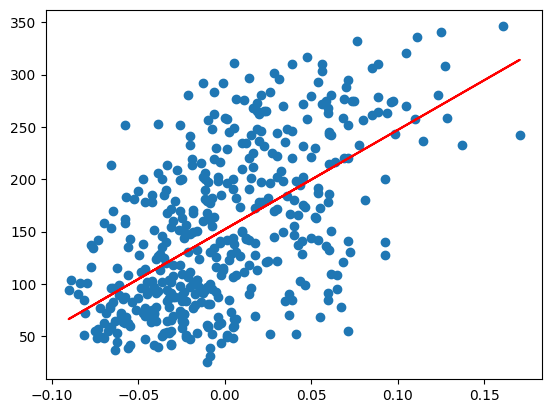

In [ ]:
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
X, y = load_diabetes(return_X_y=True)
X=X[:,2].reshape(-1,1)
X=np.hstack((np.ones((X.shape[0],1)),X))

# <START>
# Use numpy code alone to find the coefficients of x and the constant term 1 to best approximate the given function
coefs = np.ones(X.shape[1]) # default initialization
plt.scatter(X[:,-1], y)
plt.plot(X[:,-1], np.matmul(X, coefs), color='red')

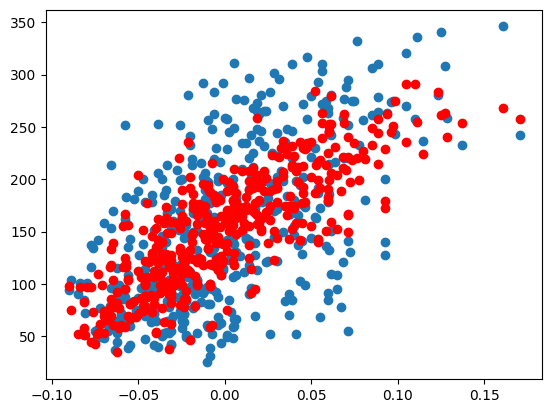

In [ ]:
# Experiment with your model if you ran it not only with one feature, but with multiple features. Ofc, we won't be able to visualize it anymore
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt
X, y = load_diabetes(return_X_y=True)
X=np.hstack((np.ones((X.shape[0],1)),X))

# <START>
# Use numpy code alone to find the coefficients of x and the constant term 1 to best approximate the given function
coefs = np.ones(X.shape[1])
plt.scatter(X[:,3], y)
plt.scatter(X[:,3], np.matmul(X, coefs), color='red')

Ever heard of polynomial regression? Even more than with only linear features, numpy is very useful when carrying out polynomial regression, as the number of features could be very large.

First, given a column (which represents a variable), write code to generate an ndarray with all of its powers up to a certain m.

For instance, if
```python
arr=np.array([1,2,3])
m=2
```
The output should be
```python
array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]])
```

First, write code of your own to perform this task. Then, look up the numpy documentation for an automated way to perform this.

<details>
<summary><strong>Hint</strong></summary>
The matrix we want is called the Vandermonde matrix. Search for numpy methods to create the Vandermonde matrix
</details>


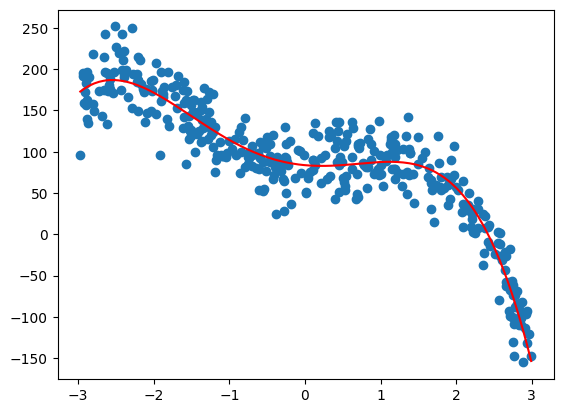

In [ ]:
import pandas as pd
from scipy.linalg import lstsq
from matplotlib import pyplot as plt
# Your code here
data=pd.read_csv('./train.csv')
data.sort_values(by='x', inplace=True)
X=data['x']
y=data['y']

# Write code here to manipulate X in order to get a better fit to the data than what you would see if you ran this code without changing anything
# If you want, you can change the variable names. Just be sure to change it in the line below which calls the function test() as well
# End code

def test(X):
    global y
    X_copy = X.to_numpy() if not isinstance(X, np.ndarray) else X
    if X_copy.ndim==1 or np.linalg.norm(X_copy[:,-1]-np.ones(X_copy.shape[0]))<1e-3:    
        X_copy=np.hstack((np.ones((X.shape[0], 1)), X_copy.reshape((X.shape[0], 1))))   
    y_pred=np.matmul(X_copy,lstsq(X_copy, y)[0])
    plt.scatter(X_copy[:,1], y)
    plt.plot(X_copy[:,1], y_pred, color='red')

test(X)

In [ ]:
# One sample plot is stored in sample_plot.png. Run this code to view the plot
from PIL import Image
image = Image.open('sample_plot.png')
image.show()

In the question above, we only asked you to implement higher order regression with one variable. In real life, situations with multiple variables is a lot more likely (this could mean that the response variable y can be determined by taking the square of a particular variable, or by taking the product of two different components of the data).

The scikit-learn module makes this incredibly easy using the PolynomialFeatures method (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), but to the best of my knowledge, I could not find anything close to PolynomialFeatures in numpy (numpy's polyvander comes close, but there is a subtle but important difference).

In this part, we want you to write code that works similarly to scikit-learn's Polynomial Features, taking a m*n ndarray and a maximum power, and returning a matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

For instance, if
```python
arr2=np.array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]])
m=2
```
The output should be
```python
array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  2.,  4.,  1.,  2.,  4.,  4.,  8., 16.],
       [ 1.,  1.,  3.,  9.,  1.,  3.,  9.,  9., 27., 81.]])
```

For this part, we are not concerned with the order amongst the columns in the output, or the time taken by your code (within reasonable bounds).
<details>
<summary><strong>Hint</strong></summary>
np.vstack() was a huge help in implementing this function. Creating a recursive function to do your job for you might be good.
</details>
